In [1]:
!pip install pandas openpyxl

In [ ]:
##Prospect Emails (Current)

In [175]:
import pandas as pd

df = pd.read_excel('Cleaned_Updated_Marketing_Data.xlsx', sheet_name='Prospect Emails (Current)', header=0)

df = df.dropna(axis=1, how='all').drop_duplicates()

df.columns = (df.columns.map(str)
              .str.strip()
              .str.replace(' ', '_')
              .str.replace('.', '', regex=False))

if 'Total_Sent' in df.columns:
    df = df[df['Total_Sent'] != 0]

net_ctr_cols = [col for col in df.columns if col.startswith("Net_CTR")]

if not net_ctr_cols:
    print("No Net CTR columns found.")
    top5_prospect = pd.DataFrame()
else:
    for col in net_ctr_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df['Avg_Net_CTR'] = df[net_ctr_cols].mean(axis=1)
    
    df_sorted = df.sort_values('Avg_Net_CTR', ascending=True)
    
    unique_avgs = df_sorted['Avg_Net_CTR'].unique()
    if len(unique_avgs) >= 5:
        threshold = unique_avgs[4]
    else:
        threshold = unique_avgs[-1]
    
    top5_prospect = df_sorted[df_sorted['Avg_Net_CTR'] <= threshold].copy()
    
    top5_prospect = top5_prospect.reset_index(drop=True)
    top5_prospect.index = top5_prospect.index + 1
    top5_prospect.index.name = 'Rank'

    top5_prospect['Source'] = 'Prospect Emails'

    print("=== Top 5 emails by Average Net CTR (including ties) — Prospect Emails ===")
    display(top5_prospect)

=== Top 5 emails by Average Net CTR (including ties) — Prospect Emails ===


,Key,Version,Timeline,Email_Name,Preheader,Email_Body_Text,Links_Clicked_(Date_range_7/21/2024-12/31/2024),Total_Clicks,Unique_Clicks,Net_CTR,Version1,Links_Clicked_(Date_range_1/1/23-7/21/24),Total_Clicks1,Unique_Clicks1,Net_CTR1,Version2,Links_Clicked_(Date_range_1/1/23-7/21/24)1,Total_Clicks2,Unique_Clicks2,Net_CTR2,Version3,Links_Clicked_(Date_range_1/1/23-10/12/23),Total_Clicks3,Unique_Clicks3,Net_CTR3,Avg_Net_CTR,Source
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,9,1 Day (after entering journey),RFI Dynamic Email_blocks,Step 1 – done!,"Welcome FIRST NAME, \n\nThank you for your in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecommunications and Distributed Systems,1.0,1.0,0.0005,0.0005,Prospect Emails
2,9,9,1 Day (after entering journey),RFI Dynamic Email_blocks,Step 1 – done!,"Welcome FIRST NAME, \n\nThank you for your in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Information and Network Security,1.0,1.0,0.0005,0.0005,Prospect Emails
3,9,9,1 Day (after entering journey),RFI Dynamic Email_blocks,Step 1 – done!,"Welcome FIRST NAME, \n\nThank you for your in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecommunications,1.0,1.0,0.0005,0.0005,Prospect Emails
4,9,9,1 Day (after entering journey),RFI Dynamic Email_blocks,Step 1 – done!,"Welcome FIRST NAME, \n\nThank you for your in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,linkedin follow,1.0,1.0,0.0005,0.0005,Prospect Emails
5,9,9,1 Day (after entering journey),RFI Dynamic Email_blocks,Step 1 – done!,"Welcome FIRST NAME, \n\nThank you for your in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manage Preferences,1.0,1.0,0.0005,0.0005,Prospect Emails
6,9,9,1 Day (after entering journey),RFI Dynamic Email_blocks,Step 1 – done!,"Welcome FIRST NAME, \n\nThank you for your in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,our department,1.0,1.0,0.0005,0.0005,Prospect Emails
7,9,9,1 Day (after entering journey),RFI Dynamic Email_blocks,Step 1 – done!,"Welcome FIRST NAME, \n\nThank you for your in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.isp.pitt.edu/,1.0,1.0,0.0005,0.0005,Prospect Emails
8,9,9,1 Day (after entering journey),RFI Dynamic Email_blocks,Step 1 – done!,"Welcome FIRST NAME, \n\nThank you for your in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Our faculty,1.0,1.0,0.0005,0.0005,Prospect Emails
9,9,9,1 Day (after entering journey),RFI Dynamic Email_blocks,Step 1 – done!,"Welcome FIRST NAME, \n\nThank you for your in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geoinformatics,1.0,1.0,0.0005,0.0005,Prospect Emails


In [177]:
##Admit Journey BY EMAIL

In [179]:
df = pd.read_excel('Cleaned_Updated_Marketing_Data.xlsx', sheet_name='Admit Journey BY EMAIL', header=0)

df = df.dropna(axis=1, how='all')
df.columns = df.columns.map(str).str.strip().str.replace(' ', '_')

df = df[df['Total_Sent'] != 0]

df['Unique_Open_Rate'] = pd.to_numeric(df['Unique_Open_Rate'], errors='coerce')
df['Unique_Click_Rate'] = pd.to_numeric(df['Unique_Click_Rate'], errors='coerce')

df_sorted = df.sort_values(by=['Unique_Open_Rate', 'Unique_Click_Rate'], ascending=[True, True])

if len(df_sorted) >= 5:
    threshold = tuple(df_sorted.iloc[4][['Unique_Open_Rate', 'Unique_Click_Rate']])
    mask = df_sorted[['Unique_Open_Rate', 'Unique_Click_Rate']].apply(tuple, axis=1) <= threshold
    top5_admit_journey = df_sorted[mask].copy()
else:
    top5_admit_journey = df_sorted.copy()

top5_admit_journey = top5_admit_journey.reset_index(drop=True)
top5_admit_journey.index = top5_admit_journey.index + 1
top5_admit_journey.index.name = 'Rank'

top5_admit_journey['Source'] = 'Admit Journey By Email'

print("=== Top 5 emails by Unique Open & Click Rate (including ties) — Admit Journey ===")
display(top5_admit_journey)

=== Top 5 emails by Unique Open & Click Rate (including ties) — Admit Journey ===


,Key,Version,Email_Name,Total_Sent,Total_Delivered,Delivery_Rate,Total_Bounces,Bounce_Rate,Total_Soft_Bounces,Soft_Bounce_Rate,Total_Hard_Bounces,Hard_Bounce_Rate,Total_Block_Bounces,Block_Bounce_Rate,Total_Opens,Unique_Opens,Unique_Open_Rate,Total_Unique_Mobile_Opens,Unique_Mobile_Open_Rate,Total_Clicks,Unique_Clicks,Unique_Click_Rate,Source
Rank,,,,,,,,,,,,,,,,,,,,,,,
1,115,3.0,Email8_ from Emily Bennett,9,9,1.0,0,0.0,0,0.0,0,0.0,0,0.0,9,4,0.4444,0,0.0000,0,0,0.0000,Admit Journey By Email
2,77,2.0,Email6_Get Involved at Pitt ...,25,25,1.0,0,0.0,0,0.0,0,0.0,0,0.0,34,15,0.6000,2,0.0800,2,1,0.0400,Admit Journey By Email
3,124,3.0,Email7_Welcome from Chancellor Gabel,13,13,1.0,0,0.0,0,0.0,0,0.0,0,0.0,14,8,0.6154,1,0.0769,0,0,0.0000,Admit Journey By Email
4,84,2.0,About SCI Video_SCI ...,21,21,1.0,0,0.0,0,0.0,0,0.0,0,0.0,25,13,0.6190,2,0.0952,1,1,0.0476,Admit Journey By Email
5,79,2.0,Email4_Living in the city of Pittsburgh and co...,14,14,1.0,0,0.0,0,0.0,0,0.0,0,0.0,20,9,0.6429,1,0.0714,4,3,0.2143,Admit Journey By Email


In [181]:
##Admit Emails (Current)

In [183]:
df = pd.read_excel(
    'Cleaned_Updated_Marketing_Data.xlsx',
    sheet_name='Admit Emails (Current)',
    header=0
)

df = df.dropna(axis=1, how='all')

df.columns = df.columns.map(str).str.strip().str.replace(' ', '_')

ctr_cols = ['Net_CTR', 'Net_CTR1', 'Net_CTR2']
ctr_cols = [c for c in ctr_cols if c in df.columns]

df['Avg_Net_CTR'] = df[ctr_cols].mean(axis=1)

df_sorted = df.sort_values('Avg_Net_CTR', ascending=True)

unique_avgs = df_sorted['Avg_Net_CTR'].unique()
threshold = unique_avgs[4] if len(unique_avgs) >= 5 else unique_avgs[-1]
top5_admit_emails_current = df_sorted[df_sorted['Avg_Net_CTR'] <= threshold].copy()

top5_admit_emails_current = top5_admit_emails_current.reset_index(drop=True)
top5_admit_emails_current.index = top5_admit_emails_current.index + 1
top5_admit_emails_current.index.name = 'Rank'

top5_admit_emails_current['Source'] = 'Admit Emails (Current)'

print("=== Top 5 emails by average Net CTR (including ties) — Admit Emails (Current) ===")
display(top5_admit_emails_current)

=== Top 5 emails by average Net CTR (including ties) — Admit Emails (Current) ===


,Key,Version,Unnamed:_2,Email_Name,Preheader,Email_Body_Text,Links_Clicked_(Date_range_9/3/2024_-_12/31/2024),Total_Clicks,Unique_Clicks,Net_CTR,Version.1,Links_Clicked_(Date_range_2/27/2024-9/3/2024),Total_Clicks.1,Unique_Clicks.1,Net_CTR.1,Version.2,Links_Clicked_(Date_range_10/6/2023_-_2/27/2024),Total_Clicks.2,Unique_Clicks.2,Net_CTR.2,Avg_Net_CTR,Source
Rank,,,,,,,,,,,,,,,,,,,,,,
1,112,3,5 Days,University of Pittsburgh Video_SCI,The best way to know it is to see it!,Consistently ranked as a top public university...,https://vimeo.com/524340781,2.0,1.0,0.0140,NaN,https://vimeo.com/524340781,8.0,7.0,0.0173,NaN,https://vimeo.com/524340781,10.0,8.0,0.0261,0.0140,Admit Emails (Current)
2,123,3,5 Days,About SCI Video_SCI,NaN,"Dear FIRST NAME, There's never been a better t...",https://pi.tt/studentcenter,1.0,1.0,0.0150,NaN,https://vimeo.com/532406348,12.0,7.0,0.0189,NaN,https://pi.tt/studentcenter,7.0,5.0,0.0169,0.0150,Admit Emails (Current)
3,117,3,5 Days,Email5_Welcome from Amanda Godley,NaN,"Dear FIRST NAME, Congratulations on your admis...",https://pi.tt/studentcenter,1.0,1.0,0.0150,NaN,Twitter: @PittGradStudies,2.0,2.0,0.0052,NaN,https://pi.tt/studentcenter,3.0,2.0,0.0066,0.0150,Admit Emails (Current)
4,118,3,5 Days,Email4_Living in the city of Pittsburgh and co...,We’ll help you get settled,"FIRST NAME, \n\nDon't be nervous! The city of...",free bus,2.0,1.0,0.0150,NaN,free bus,2.0,1.0,0.0026,NaN,free access to MANY of them,3.0,2.0,0.0066,0.0150,Admit Emails (Current)
5,118,3,5 Days,Email4_Living in the city of Pittsburgh and co...,We’ll help you get settled,"FIRST NAME, \n\nDon't be nervous! The city of...",free access to MANY of them,1.0,1.0,0.0150,NaN,https://www.sci.pitt.edu/student-resources/new...,1.0,1.0,0.0026,NaN,Watch what our students have to say about Pitt...,3.0,3.0,0.0099,0.0150,Admit Emails (Current)
6,116,3,5 Days,Email6_Get Involved at Pitt,Choosing just one might be the hardest part,"There are so many options, we’d get overwhelme...",https://pi.tt/studentcenter,1.0,1.0,0.0170,NaN,Campus Recreation,4.0,4.0,0.0108,NaN,https://pi.tt/studentcenter,3.0,2.0,0.0070,0.0170,Admit Emails (Current)
7,114,3,5 Days,Email9_ from Larissa Ciuca,NaN,"Dear FIRST NAME, \n\nWelcome to the School of...",https://www.sci.pitt.edu/student-resources/stu...,1.0,1.0,0.0200,NaN,https://www.sci.pitt.edu/student-resources/stu...,9.0,8.0,0.0223,NaN,https://www.sci.pitt.edu/student-resources/stu...,2.0,2.0,0.0074,0.0200,Admit Emails (Current)
8,114,3,5 Days,Email9_ from Larissa Ciuca,NaN,"Dear FIRST NAME, \n\nWelcome to the School of...",https://pi.tt/studentcenter,1.0,1.0,0.0200,2.0,https://pi.tt/studentcenter,23.0,8.0,0.0223,1.0,https://pi.tt/studentcenter,9.0,6.0,0.0221,0.0200,Admit Emails (Current)
9,113,3,5 Days,SCI News and Events - admits email,You won’t believe the access Pitt students have,As a student at the University of Pittsburgh y...,University events calendar,4.0,3.0,0.0242,NaN,news in our School,7.0,4.0,0.0093,NaN,news in our School,4.0,3.0,0.0096,0.0242,Admit Emails (Current)


In [185]:
##Info Session BY EMAIL

In [187]:
import pandas as pd

df = pd.read_excel(
    'Cleaned_Updated_Marketing_Data.xlsx',
    sheet_name='Info Session BY EMAIL',
    header=0
)

df = df.dropna(axis=1, how='all')

df.columns = df.columns.map(str).str.strip()

sort_cols = [
    'Unique Open Rate',
    'Unique Click Rate',
    'Conversion Rate',
    'Unsubscribe Rate'
]
ascending = [True, True, True, False]

df_sorted = df.sort_values(by=sort_cols, ascending=ascending)

if len(df_sorted) >= 5:
    threshold = tuple(df_sorted.iloc[4][sort_cols])
    mask = df_sorted[sort_cols].apply(tuple, axis=1) <= threshold
    top5_info_session_by_email = df_sorted[mask].copy()
else:
    top5_info_session_by_email = df_sorted.copy()

top5_info_session_by_email = top5_info_session_by_email.reset_index(drop=True)
top5_info_session_by_email.index = top5_info_session_by_email.index + 1
top5_info_session_by_email.index.name = 'Rank'

top5_info_session_by_email['Source'] = 'Info Session BY EMAIL'

print("=== Top 5 Info Session BY EMAIL (including ties) ===")
display(top5_info_session_by_email)

=== Top 5 Info Session BY EMAIL (including ties) ===


,Key,Version,Email Name,Total Sent,Total Delivered,Delivery Rate,Total Bounces,Bounce Rate,Total Soft Bounces,Soft Bounce Rate,Total Hard Bounces,Hard Bounce Rate,Total Block Bounces,Block Bounce Rate,Total Opens,Unique Opens,Unique Open Rate,Total Unique Mobile Opens,Unique Mobile Open Rate,Total Clicks,Unique Clicks,Unique Click Rate,Total Unsubscribes,Unsubscribe Rate,Total Converions,Conversion Rate,Source
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,NaN,NaN,9285,9219,0.992892,66,0.007108,41,0.004416,23,0.002477,2,0.000215,10553,5297,0.574574,538,0.058358,574,313,0.033952,37,0.004013,0,0,Info Session BY EMAIL
2,145,NaN,NaN,9285,9219,0.992892,66,0.007108,41,0.004416,23,0.002477,2,0.000215,10553,5297,0.574574,538,0.058358,574,313,0.033952,37,0.004013,0,0,Info Session BY EMAIL
3,144,1.0,Monthly Info Sessions Reminder email - journey...,9285,9219,0.992900,66,0.007100,41,0.004400,23,0.002500,2,0.000200,10553,5297,0.574600,538,0.058400,574,313,0.034000,37,0.004000,0,0,Info Session BY EMAIL
4,140,1.0,Graduate Programs Info Session - Missed you ...,518,517,0.998100,1,0.001900,1,0.001900,0,0.000000,0,0.000000,721,372,0.719500,36,0.069600,47,38,0.073500,0,0.000000,0,0,Info Session BY EMAIL
5,4,NaN,NaN,518,517,0.998069,1,0.001931,1,0.001931,0,0.000000,0,0.000000,721,372,0.719536,36,0.069632,47,38,0.073501,0,0.000000,0,0,Info Session BY EMAIL
6,141,NaN,NaN,518,517,0.998069,1,0.001931,1,0.001931,0,0.000000,0,0.000000,721,372,0.719536,36,0.069632,47,38,0.073501,0,0.000000,0,0,Info Session BY EMAIL


In [188]:
##Info Session (Current)

In [191]:
df = pd.read_excel(
    'Cleaned_Updated_Marketing_Data.xlsx',
    sheet_name='Info Session (Current)',
    header=0
)

df = df.dropna(axis=1, how='all')
df.columns = df.columns.map(str).str.strip()
unique_ctrs = sorted(df['Net CTR'].unique())

if len(unique_ctrs) >= 5:
    threshold = unique_ctrs[4]
else:
    threshold = unique_ctrs[-1]

top5_info_session_current = df[df['Net CTR'] <= threshold].copy()
top5_info_session_current = top5_info_session_current.reset_index(drop=True)
top5_info_session_current.index = top5_info_session_current.index + 1
top5_info_session_current.index.name = 'Rank'
top5_info_session_current['Source'] = 'Info Session (Current)'

print("=== Top 5 emails by Net CTR (including ties) — Info Session (Current) ===")
display(top5_info_session_current)

=== Top 5 emails by Net CTR (including ties) — Info Session (Current) ===


,Key,Version,Timeline,Email Name,Preheader,Email Body Text,Links Clicked (Date range 1/1/2024 - 12/31/2024),Total Clicks,Unique Clicks,Net CTR,Source
Rank,,,,,,,,,,,
1,144,1,Every 28 days,Monthly Info Sessions Reminder email - journey...,A chat with SCI admissions might be just what ...,"FIRST NAME, \n\nDo you aspire to take your car...",facebook follow,5.0,4.0,0.000,Info Session (Current)
2,144,1,Every 28 days,Monthly Info Sessions Reminder email - journey...,A chat with SCI admissions might be just what ...,"FIRST NAME, \n\nDo you aspire to take your car...",linkedin follow,5.0,4.0,0.000,Info Session (Current)
3,144,1,Every 28 days,Monthly Info Sessions Reminder email - journey...,A chat with SCI admissions might be just what ...,"FIRST NAME, \n\nDo you aspire to take your car...",Manage Preferences,6.0,4.0,0.000,Info Session (Current)
4,144,1,Every 28 days,Monthly Info Sessions Reminder email - journey...,A chat with SCI admissions might be just what ...,"FIRST NAME, \n\nDo you aspire to take your car...",instagram follow,4.0,3.0,0.000,Info Session (Current)
5,144,1,Every 28 days,Monthly Info Sessions Reminder email - journey...,A chat with SCI admissions might be just what ...,"FIRST NAME, \n\nDo you aspire to take your car...",twitter follow,4.0,3.0,0.000,Info Session (Current)
6,144,1,Every 28 days,Monthly Info Sessions Reminder email - journey...,A chat with SCI admissions might be just what ...,"FIRST NAME, \n\nDo you aspire to take your car...",https://www.instagram.com/pitt_sci/?hl=en,2.0,1.0,0.000,Info Session (Current)
7,144,1,Every 28 days,Monthly Info Sessions Reminder email - journey...,A chat with SCI admissions might be just what ...,"FIRST NAME, \n\nDo you aspire to take your car...",LEARN MORE,9.0,8.0,0.001,Info Session (Current)
8,134,10,7 days before event,Graduate Program Info Session RSVP Reminder em...,NaN,"FIRST NAME, \n\nDon’t forget, you are registe...",REQUEST INFO,2.0,1.0,0.002,Info Session (Current)
9,140,1,Immediately upon status change (variable),Graduate Programs Info Session - Missed you ...,NaN,"First_Name,\nWe missed you at our latest Infor...",APPLY NOW,1.0,1.0,0.002,Info Session (Current)


In [192]:
##Single Send Summary

In [195]:
df = pd.read_excel(
    'Cleaned_Updated_Marketing_Data.xlsx',
    sheet_name='Single Send Summary',
    header=0
)

df = df.dropna(axis=1, how='all')
df.columns = df.columns.map(str).str.strip()

if len(df) >= 5:
    threshold = tuple(df.iloc[4][['Unique Click-Through Rate', 'Open Rate']])
else:
    threshold = (df['Unique Click-Through Rate'].max(), df['Open Rate'].max())

mask = df[['Unique Click-Through Rate', 'Open Rate']].apply(tuple, axis=1) <= threshold
top5_single_send_summary = df[mask].reset_index(drop=True)
top5_single_send_summary.index = top5_single_send_summary.index + 1
top5_single_send_summary.index.name = 'Rank'
top5_single_send_summary['Source'] = 'Single Send Summary'

print("=== Top 5 (including ties) by Unique Click-Through Rate & Open Rate — Single Send Summary ===")
display(top5_single_send_summary)

=== Top 5 (including ties) by Unique Click-Through Rate & Open Rate — Single Send Summary ===


,Email Name,Subject Line,Population,Date and Time Sent,Emails Sent,Unique Click-Through Rate,Open Rate,Deliverability Rate,Source
Rank,,,,,,,,,
1,Doctoral Guild Workspace Invitation,Join our PhD Student’s Slack Workspace!,"2251 Admitted - 2,4,6,8",2024-06-03 10:59:00,31,0.000,0.839,1.000,Single Send Summary
2,Doctoral Guild Workspace Invitation,Join our PhD Student’s Slack Workspace!,2251 Admitted,2024-05-28 12:14:00,31,0.000,0.839,1.000,Single Send Summary
3,Doctoral Guild Workspace Invitation,Join our PhD Student’s Slack Workspace!,2251 Admitted,2024-05-20 15:30:00,31,0.000,0.871,1.000,Single Send Summary
4,Doctoral Guild Workspace Invitation,Join our PhD Student’s Slack Workspace!,2251 Admitted,2024-05-15 12:34:00,31,0.000,0.903,1.000,Single Send Summary
5,SCI Newsletter October 2024_v1,SCI Graduate Student Spotlight - October,All Majors - Prospective,2024-10-31 16:48:00,299,0.007,0.728,0.997,Single Send Summary


In [196]:
def standardize_columns(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(r'[^a-z0-9_]', ' ', regex=True)
        .str.replace(r'\s+', '_', regex=True)
        .str.replace(r'_+', '_', regex=True)
        .str.strip('_')
    )
    return df

def add_body(df_top5, sheet_name):
    raw = pd.read_excel('Cleaned_Updated_Marketing_Data.xlsx', sheet_name=sheet_name, header=0)
    raw = standardize_columns(raw)
    if 'email_name' not in raw.columns:
        raw = raw.rename(columns={'email_name': 'email_name', 'email name': 'email_name'})
    if 'email_body_text' in raw.columns:
        raw = raw.drop_duplicates(subset=['email_name'])
        merged = df_top5.merge(raw[['email_name','email_body_text']], on='email_name', how='left', suffixes=('', '_dup'))
        if 'email_body_text_dup' in merged.columns:
            merged['email_body_text'] = merged['email_body_text'].combine_first(merged['email_body_text_dup'])
            merged.drop(columns=['email_body_text_dup'], inplace=True)
        return merged
    else:
        df_top5['email_body_text'] = None
        return df_top5

top5_prospect = standardize_columns(top5_prospect)
top5_admit_journey = standardize_columns(top5_admit_journey)
top5_admit_emails_current = standardize_columns(top5_admit_emails_current)
top5_info_session_by_email = standardize_columns(top5_info_session_by_email)
top5_info_session_current = standardize_columns(top5_info_session_current)
top5_single_send_summary = standardize_columns(top5_single_send_summary)

top5_prospect = add_body(top5_prospect, 'Prospect Emails (Current)')
top5_prospect = top5_prospect[['email_name', 'avg_net_ctr', 'email_body_text', 'source']]

top5_admit_journey = add_body(top5_admit_journey, 'Admit Journey BY EMAIL')
top5_admit_journey = top5_admit_journey[['email_name', 'unique_open_rate', 'unique_click_rate', 'email_body_text', 'source']]

top5_admit_emails_current = add_body(top5_admit_emails_current, 'Admit Emails (Current)')
top5_admit_emails_current = top5_admit_emails_current[['email_name', 'avg_net_ctr', 'email_body_text', 'source']]

top5_info_session_by_email = add_body(top5_info_session_by_email, 'Info Session BY EMAIL')
top5_info_session_by_email = top5_info_session_by_email[['email_name', 'unique_open_rate', 'unique_click_rate', 'conversion_rate', 'email_body_text', 'source']]

top5_info_session_current = add_body(top5_info_session_current, 'Info Session (Current)')
top5_info_session_current = top5_info_session_current[['email_name', 'net_ctr', 'email_body_text', 'source']]

top5_single_send_summary = add_body(top5_single_send_summary, 'Single Send Summary')
top5_single_send_summary = top5_single_send_summary[['email_name', 'open_rate', 'unique_click_through_rate', 'email_body_text', 'source']]

dfs = [
    top5_prospect,
    top5_admit_journey,
    top5_admit_emails_current,
    top5_info_session_by_email,
    top5_info_session_current,
    top5_single_send_summary
]
dfs = [d for d in dfs if not d.empty]
df_combined = pd.concat(dfs, ignore_index=True)
df_combined = df_combined.reset_index(drop=True)
df_combined['duplicate_flag'] = df_combined.duplicated(subset=['email_name'], keep=False)
df_combined.index = df_combined.index + 1
df_combined.index.name = 'overall_rank'


all_columns = [
    'email_name', 'avg_net_ctr', 'unique_open_rate', 'unique_click_rate',
    'conversion_rate', 'net_ctr', 'open_rate', 'unique_click_through_rate',
    'email_body_text', 'source'
]
df_combined = df_combined.reindex(columns=all_columns)

df_combined['word_count'] = df_combined['email_body_text'].astype(str).str.split().str.len()
df_combined['subject_length'] = df_combined['email_name'].astype(str).str.len()

pd.set_option('display.max_columns', None)
print("=== Combined Low-Performing Emails with Email Body Text and Derived Features ===")
front_cols = ['email_name', 'email_body_text', 'source']
other_cols = [col for col in df_combined.columns if col not in front_cols]
df_combined = df_combined[front_cols + other_cols]

display(df_combined)

=== Combined Low-Performing Emails with Email Body Text and Derived Features ===


,email_name,email_body_text,source,avg_net_ctr,unique_open_rate,unique_click_rate,conversion_rate,net_ctr,open_rate,unique_click_through_rate,word_count,subject_length
overall_rank,,,,,,,,,,,,
1,RFI Dynamic Email_blocks,"Welcome FIRST NAME, \n\nThank you for your in...",Prospect Emails,0.0005,NaN,NaN,NaN,NaN,NaN,NaN,152,24
2,RFI Dynamic Email_blocks,"Welcome FIRST NAME, \n\nThank you for your in...",Prospect Emails,0.0005,NaN,NaN,NaN,NaN,NaN,NaN,152,24
3,RFI Dynamic Email_blocks,"Welcome FIRST NAME, \n\nThank you for your in...",Prospect Emails,0.0005,NaN,NaN,NaN,NaN,NaN,NaN,152,24
4,RFI Dynamic Email_blocks,"Welcome FIRST NAME, \n\nThank you for your in...",Prospect Emails,0.0005,NaN,NaN,NaN,NaN,NaN,NaN,152,24
5,RFI Dynamic Email_blocks,"Welcome FIRST NAME, \n\nThank you for your in...",Prospect Emails,0.0005,NaN,NaN,NaN,NaN,NaN,NaN,152,24
...,...,...,...,...,...,...,...,...,...,...,...,...
65,Doctoral Guild Workspace Invitation,None,Single Send Summary,NaN,NaN,NaN,NaN,NaN,0.839,0.000,1,35
66,Doctoral Guild Workspace Invitation,None,Single Send Summary,NaN,NaN,NaN,NaN,NaN,0.839,0.000,1,35
67,Doctoral Guild Workspace Invitation,None,Single Send Summary,NaN,NaN,NaN,NaN,NaN,0.871,0.000,1,35


In [198]:
df_combined['engagement_score'] = (
    df_combined['unique_click_rate']
    .fillna(df_combined['unique_click_through_rate'])
    .fillna(df_combined['avg_net_ctr'])
    .fillna(df_combined['net_ctr'])
    .fillna(df_combined['open_rate'])
    .fillna(df_combined['unique_open_rate'])
    .fillna(0)
)
df_lowest = df_combined.sort_values(by='engagement_score', ascending=True)
df_lowest_unique = df_lowest.drop_duplicates(subset=['email_name', 'source'], keep='first')

columns_to_show = [
    'email_name', 'source', 'engagement_score',
    'avg_net_ctr', 'unique_open_rate', 'open_rate',
    'unique_click_rate', 'unique_click_through_rate'
]
df_display = df_lowest_unique[columns_to_show].reset_index(drop=True)
df_display.index = df_display.index + 1
df_display.index.name = 'Rank'

print("=== Lowest Unique Engagement Emails by Source ===")
display(df_display)

=== Lowest Unique Engagement Emails by Source ===


,email_name,source,engagement_score,avg_net_ctr,unique_open_rate,open_rate,unique_click_rate,unique_click_through_rate
Rank,,,,,,,,
1,Doctoral Guild Workspace Invitation,Single Send Summary,0.000000,NaN,NaN,0.871,NaN,0.000
2,Monthly Info Sessions Reminder email - journey...,Info Session (Current),0.000000,NaN,NaN,NaN,NaN,NaN
3,Email7_Welcome from Chancellor Gabel,Admit Journey By Email,0.000000,NaN,0.615400,NaN,0.000000,NaN
4,Email8_ from Emily Bennett,Admit Journey By Email,0.000000,NaN,0.444400,NaN,0.000000,NaN
5,RFI Dynamic Email_blocks,Prospect Emails,0.000500,0.0005,NaN,NaN,NaN,NaN
6,Career Resources - email 1,Prospect Emails,0.000600,0.0006,NaN,NaN,NaN,NaN
7,Welcome from Adam Lee,Prospect Emails,0.000600,0.0006,NaN,NaN,NaN,NaN
8,Invite to Information sessions - journey,Prospect Emails,0.000600,0.0006,NaN,NaN,NaN,NaN
9,Welcome from Student Success,Prospect Emails,0.000800,0.0008,NaN,NaN,NaN,NaN


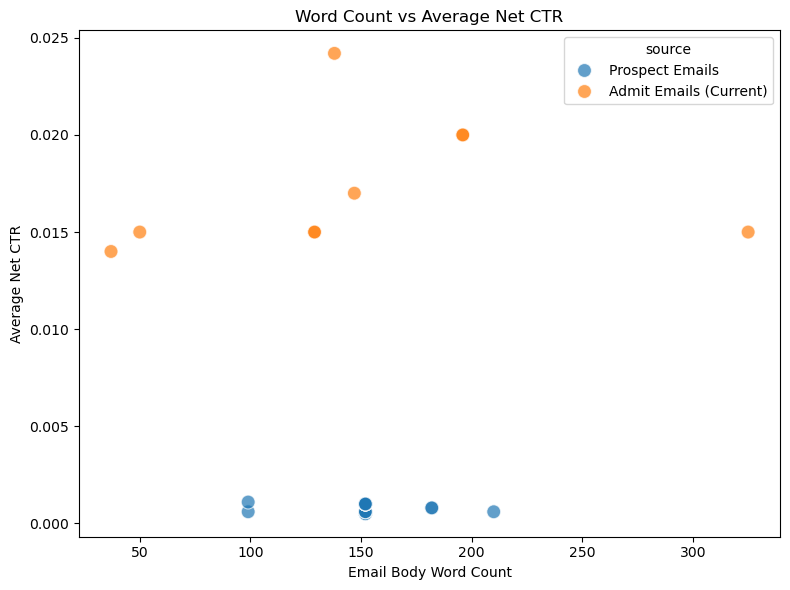

In [225]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_combined.dropna(subset=['avg_net_ctr']),
    x='word_count',
    y='avg_net_ctr',
    hue='source',
    s=100,
    alpha=0.7
)
plt.title('Word Count vs Average Net CTR')
plt.xlabel('Email Body Word Count')
plt.ylabel('Average Net CTR')
plt.tight_layout()
plt.show()

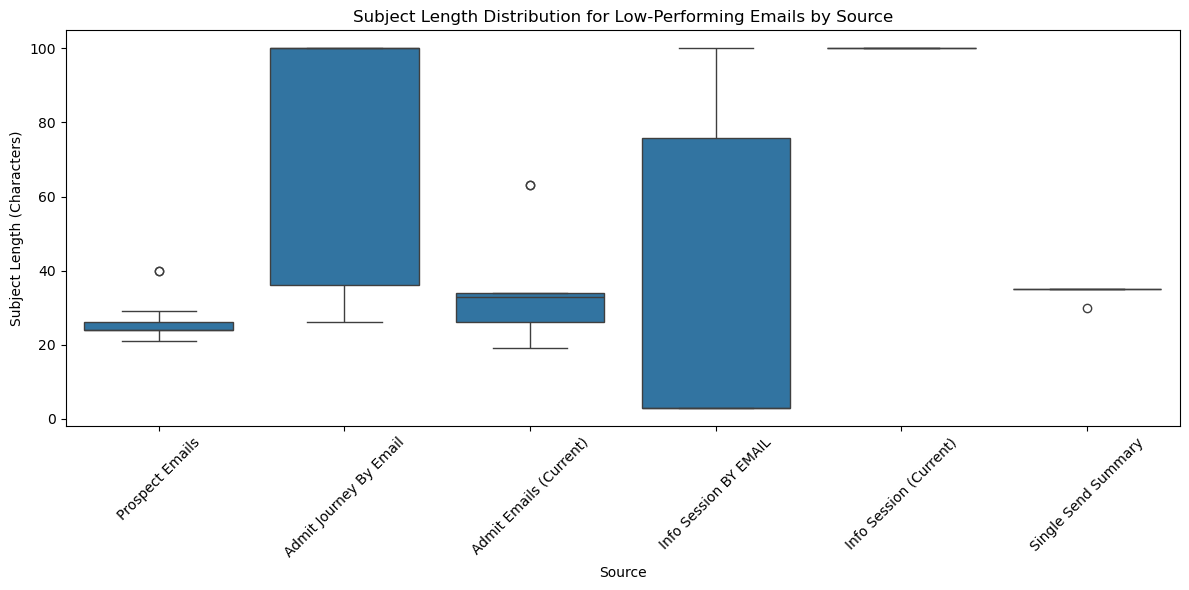

In [203]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined, x='source', y='subject_length')
plt.title('Subject Length Distribution for Low-Performing Emails by Source')
plt.xlabel('Source')
plt.ylabel('Subject Length (Characters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

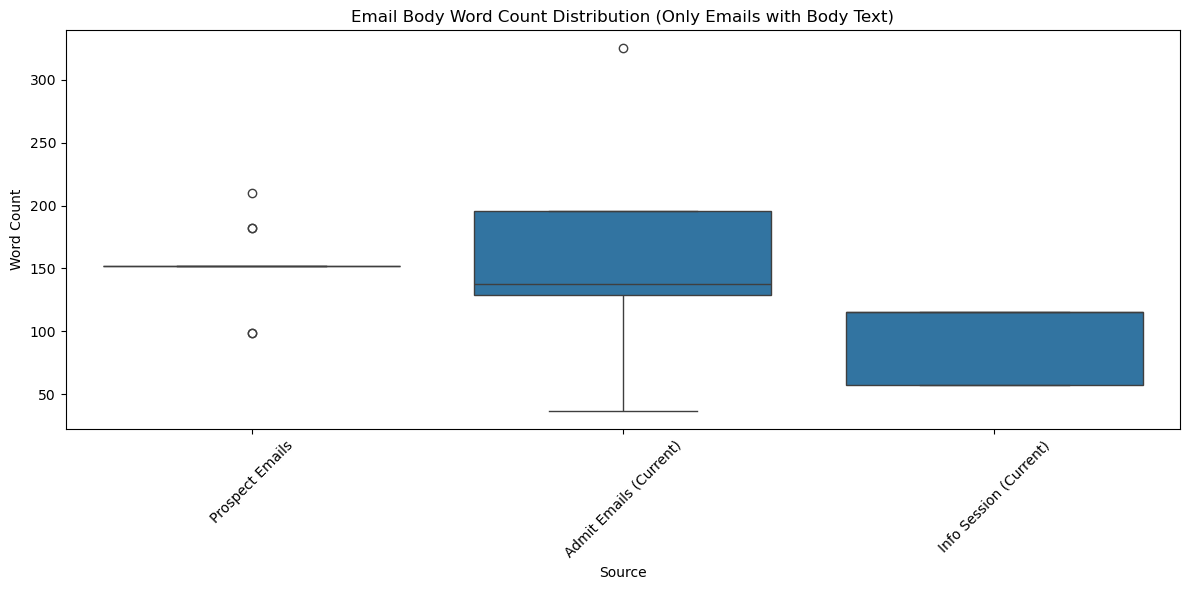

In [205]:
sources_with_content = ['Admit Emails (Current)', 'Prospect Emails', 'Info Session (Current)']
df_filtered = df_combined[df_combined['source'].isin(sources_with_content)]

df_filtered = df_filtered[df_filtered['email_body_text'].astype(str).str.strip().ne('')]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='source', y='word_count')
plt.title('Email Body Word Count Distribution (Only Emails with Body Text)')
plt.xlabel('Source')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

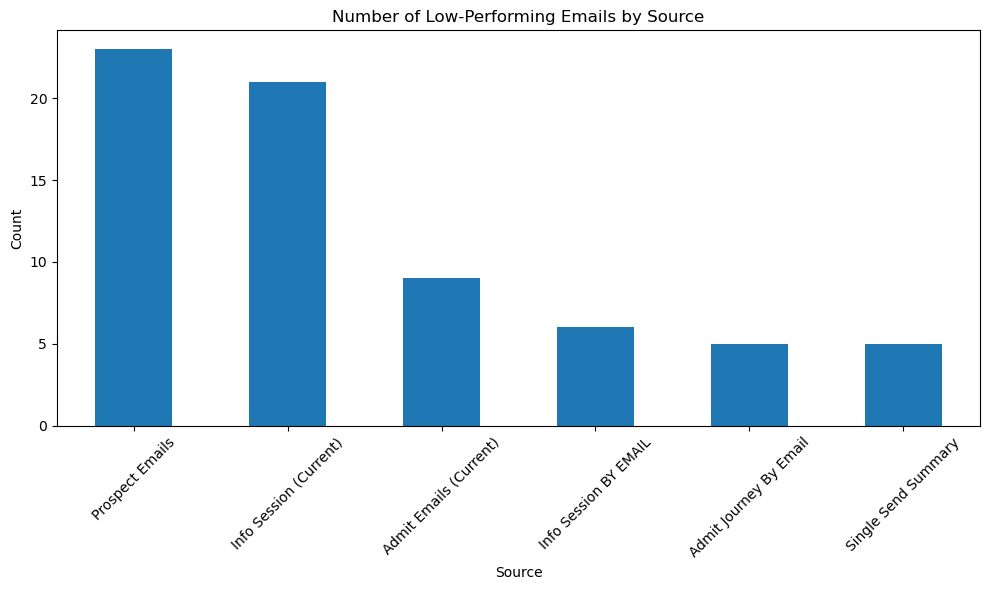

In [207]:
source_counts = df_combined['source'].value_counts()
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.title('Number of Low-Performing Emails by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

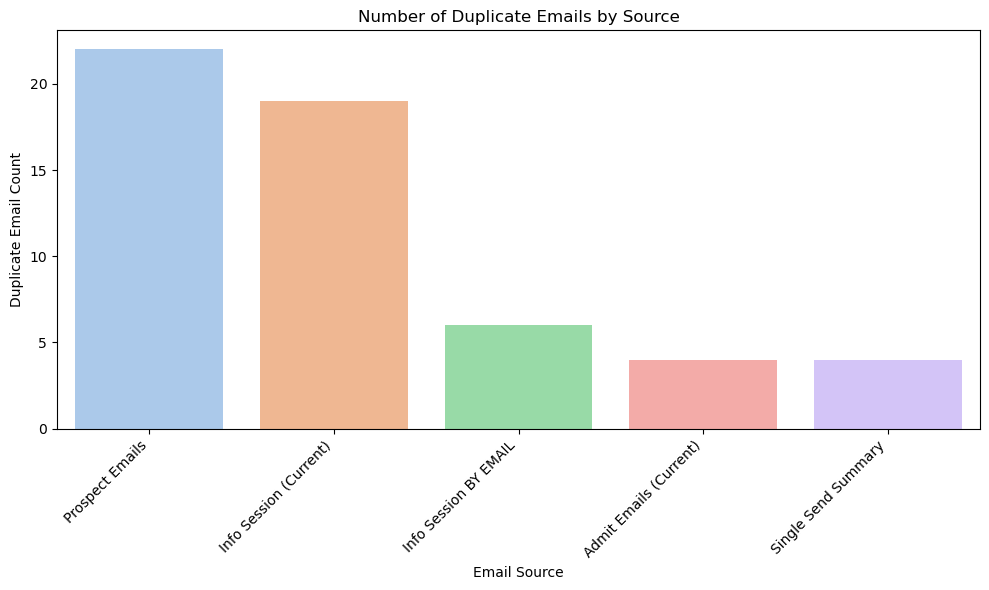

=== Duplicated Emails Across Sources ===


,email_name,source
overall_rank,,
12,Career Resources - email 1,Prospect Emails
65,Doctoral Guild Workspace Invitation,Single Send Summary
32,Email4_Living in the city of Pittsburgh and co...,Admit Emails (Current)
35,Email9_ from Larissa Ciuca,Admit Emails (Current)
51,Graduate Program Info Session RSVP Reminder em...,Info Session (Current)
41,Graduate Programs Info Session - Missed you ...,Info Session BY EMAIL
52,Graduate Programs Info Session - Missed you ...,Info Session (Current)
10,Invite to Information sessions - journey,Prospect Emails
40,Monthly Info Sessions Reminder email - journey...,Info Session BY EMAIL


In [221]:
if 'duplicate_flag' not in df_combined.columns:
    df_combined['duplicate_flag'] = df_combined.duplicated(subset='email_name', keep=False)

dup_source_counts = (
    df_combined[df_combined['duplicate_flag']]
    .groupby('source')
    .size()
    .reset_index(name='duplicated_email_count')
    .sort_values(by='duplicated_email_count', ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=dup_source_counts, x='source', y='duplicated_email_count', hue='source', palette='pastel', legend=False)
plt.title('Number of Duplicate Emails by Source')
plt.xlabel('Email Source')
plt.ylabel('Duplicate Email Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

duplicated_emails = df_combined[df_combined['duplicate_flag']][['email_name', 'source']].drop_duplicates().sort_values('email_name')
print("=== Duplicated Emails Across Sources ===")
display(duplicated_emails)